### Lasso, Ridge and Polynomial Regression

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings 

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_pickle("./data/data_air_quality_index.pkl")

In [3]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Lasso

In [6]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [7]:
lasso_pred = lasso_model.predict(X_test)

In [8]:
lasso_model.score(X_train, y_train)

0.5310785526198012

In [9]:
lasso_model.score(X_test, y_test)

0.5390324077425563

In [10]:
np.sqrt(mean_squared_error(y_test, lasso_pred))

57.18076860385143

In [11]:
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_model_gs = Lasso()
lasso_gridcv = GridSearchCV(estimator=lasso_model_gs, scoring='neg_mean_squared_error', param_grid=params, cv=5)
lasso_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [12]:
lasso_gridcv.best_estimator_

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [13]:
lasso_gridcv.best_score_

-3387.0690649750045

In [14]:
lasso_gridcv.best_params_

{'alpha': 1}

In [15]:
lasso_regressor = Lasso(alpha= 1)
lasso_regressor.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [16]:
pred_lasso_regressor = lasso_regressor.predict(X_test)

In [17]:
lasso_regressor.score(X_train, y_train)

0.5310785526198012

In [18]:
lasso_regressor.score(X_test, y_test)

0.5390324077425563

In [19]:
mean_squared_error(y_test, pred_lasso_regressor)

3269.6402981272017

In [20]:
pd.Series(lasso_regressor.coef_, index=X.columns).sort_values(ascending=False)

VM      0.504539
SLP     0.262910
TM      0.000000
T      -0.761024
H      -1.211730
V      -2.118134
Tm     -5.000604
VV    -38.404148
dtype: float64

### Ridge Regression

In [21]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
ridge_pred = ridge_model.predict(X_test)

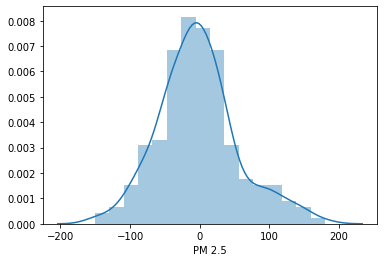

In [23]:
sns.distplot(y_test-ridge_pred)
plt.show()

In [112]:
(y_test-ridge_pred).var()

11393.131670743285

In [24]:
ridge_model.score(X_train, y_train)

0.5316430151747227

In [25]:
ridge_model.score(X_test, y_test)

0.5358080787980443

In [26]:
mean_squared_error(y_test, ridge_pred)

3292.510443509367

In [27]:
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_model_gs = Ridge()
ridge_model = GridSearchCV(ridge_model_gs, param_grid=params, scoring='neg_mean_squared_error', cv=5)
ridge_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [28]:
ridge_model.best_estimator_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [29]:
ridge_model.best_score_

-3390.4826671361434

In [30]:
ridge_regressor = Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [31]:
predict_ridge_reg = ridge_regressor.predict(X_test)

In [32]:
ridge_regressor.score(X_train, y_train)

0.5315341217137601

In [33]:
ridge_regressor.score(X_test, y_test)

0.5375913193330495

In [34]:
mean_squared_error(y_test, predict_ridge_reg)

3279.861929356878

In [35]:
pd.Series(ridge_regressor.coef_, index=X.columns).sort_values(ascending=False)

VM      0.606974
TM      0.519204
SLP     0.289885
H      -1.222625
T      -1.290309
V      -2.285787
Tm     -4.838712
VV    -39.922811
dtype: float64

### Polynomial Features

In [122]:
polynomial = PolynomialFeatures(2)
linear_regressor = LinearRegression()

In [123]:
poly_pipeline = make_pipeline(polynomial, linear_regressor)
poly_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [124]:
pred_poly_pipeline = pd.Series(poly_pipeline.predict(X_test))
pred_poly_pipeline

0      222.600845
1      178.506288
2       45.878957
3       47.927571
4      135.888656
          ...    
214    266.559893
215    189.000372
216    144.131838
217     38.685904
218     59.123973
Length: 219, dtype: float64

In [125]:
#y_test = y_test.reset_index(drop=True)
y_test

0      152.554167
1       99.708333
2       33.791667
3        1.791667
4      113.875000
          ...    
214    264.583333
215    217.375000
216    217.916667
217     29.833333
218    102.416667
Name: PM 2.5, Length: 219, dtype: float64

In [126]:
mean_squared_error(y_test, pred_poly_pipeline)

2716.319733890913

In [127]:
poly_pipeline.score(X_train, y_train)

0.6589853779696992

In [128]:
poly_pipeline.score(X_test, y_test)

0.6367796570830382

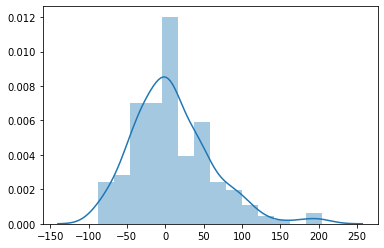

In [129]:
sns.distplot(y_test-pred_poly_pipeline)
plt.show()

In [130]:
(y_test-pred_poly_pipeline).var()

2649.116385992047